In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('dataset/data.csv', index_col=0)

변환

In [ ]:
# 통화 변환-> 실수화
def exchange(value):
    out = value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M',''))*1000
    elif 'K' in out:
        out = float(out.replace('K',''))
    return float(out)

In [ ]:
df.Value = df.Value.apply(lambda x: exchange(x))
df.Wage = df.Wage.apply(lambda x: exchange(x))
df['Release Clause'] = df['Release Clause'].astype('str')
df['Release Clause'] = df['Release Clause'].apply(lambda x: exchange(x))

In [ ]:
wr = df['Work Rate'].str.split('/', expand=True)
df['Attack_WR']= wr[0]
df['Attack_WR'].replace({'High':2, 'Medium':1,'Low':0},inplace= True)
df['Defence_WR']=wr[1]
df['Defence_WR'].replace({' High':2, ' Medium':1,' Low':0},inplace= True)

In [ ]:
결측치가 많은 칼럼이나 불필요한 칼럼 삭제결측치가 많은 칼럼이나 불필요한 칼럼 삭제

In [ ]:
# nan 행 삭제
nan_data=df.iloc[13236:13284,:]
nan_data.index
df.drop(nan_data.index,inplace = True)

In [ ]:
value=0인 선수 11명 삭제(은퇴예정?)

In [ ]:
df.query('Value==0')[['Name', 'Overall', 'Age', 'Joined', 'Contract Valid Until','Wage', 'Value','Loaned From']]
# value_zero=df[df.Value==0].index
# df.drop(value_zero, inplace=True)

,Name,Overall,Age,Joined,Contract Valid Until,Wage,Value,Loaned From
864,Hilton,78,40,"Aug 1, 2011",2019,18.0,0.0,NaN
3550,S. Nakamura,72,40,"Jan 10, 2017",2021,4.0,0.0,NaN
4228,B. Nivet,71,41,"Jul 1, 2012",2019,5.0,0.0,NaN
10356,F. Kippe,65,40,"Feb 22, 2002",2019,1.0,0.0,NaN
12192,H. Sulaimani,63,41,"Jun 11, 2018",2019,3.0,0.0,NaN
12453,W. Díaz,63,40,"Jan 10, 2016",2023,1.0,0.0,NaN
14129,Y. Nakazawa,61,40,"Jan 1, 2002",2022,1.0,0.0,NaN
17672,R. Kawai,53,39,"Jan 1, 2011",2021,1.0,0.0,NaN
17726,T. Warner,53,44,"Aug 3, 2018",2019,1.0,0.0,NaN
17752,S. Phillips,52,40,"Aug 1, 2017",2022,1.0,0.0,NaN


In [ ]:
# club nan 행 탐색
df.Club.fillna('non_club', inplace = True)
non_club_s=df[df.Club =='non_club'].index
df.drop(non_club_s,inplace = True)  

In [ ]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

## 불필요한 컬럼 삭제

In [ ]:
df.drop(['Nationality','Work Rate','Photo', 'Flag','Club Logo',
        'ID','Body Type','Height', 'Weight',
        'Attack_WR', 'Defence_WR','Preferred Foot',
        'Release Clause'], axis=1, inplace = True)

In [ ]:
joined, conract Valid Unitil(기간 계산기간 계산)

In [ ]:
df['Joined'] = pd.to_datetime(df['Joined'])

In [ ]:
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])

In [ ]:
df['Loaned From'].fillna(0,inplace=True)

In [ ]:
# 파생변수 만들기 : 임대 선수 0, 구단 소속선수 1
def Loaned(df):
    if (df['Loaned From']==0):
        return 1
    else:
        return 0
df['Loaned']=df.apply(Loaned,axis=1)

## 파생변수 만들기

In [ ]:
# Age_C
def Age_2(x):
    if x <20 : return 1
    elif (20<= x <=22): return 2
    elif (23<= x <=24): return 3
    elif (25<= x <= 26): return 4
    elif (27<= x <= 29): return 5
    elif (30<= x <=31): return 6
    elif (32<= x <=33): return 7
    elif (34 ==x): return 8
    elif (35 <= x <= 38): return 9
    elif (39 ==x): return 10
    elif (40 <= x <= 45): return 11
df['Age_C'] = df.Age.apply(Age_2) 

In [ ]:
# Over_C
def Over_2(x):
    if 46<= x <=62 : return 1
    elif 63<= x <=68 : return 2
    elif 69<= x <=72: return 3
    elif 73<= x <=75: return 4
    elif 76<= x <=78: return 5
    elif 79<= x <=80: return 6
    elif 81<= x <=82: return 7
    elif 83==x: return 8
    elif 84==x: return 9
    elif 85==x: return 10
    elif 86==x: return 11
    elif 87==x: return 12
    elif 88==x: return 13
    elif 89==x: return 14
    elif 90==x: return 15
    elif 91==x: return 16
    elif 92==x: return 17
    elif 93<= x <=94 : return 18
df['Over_C']=df.Overall.apply(Over_2)

In [ ]:
Club_Value

<AxesSubplot:xlabel='Value', ylabel='Club'>

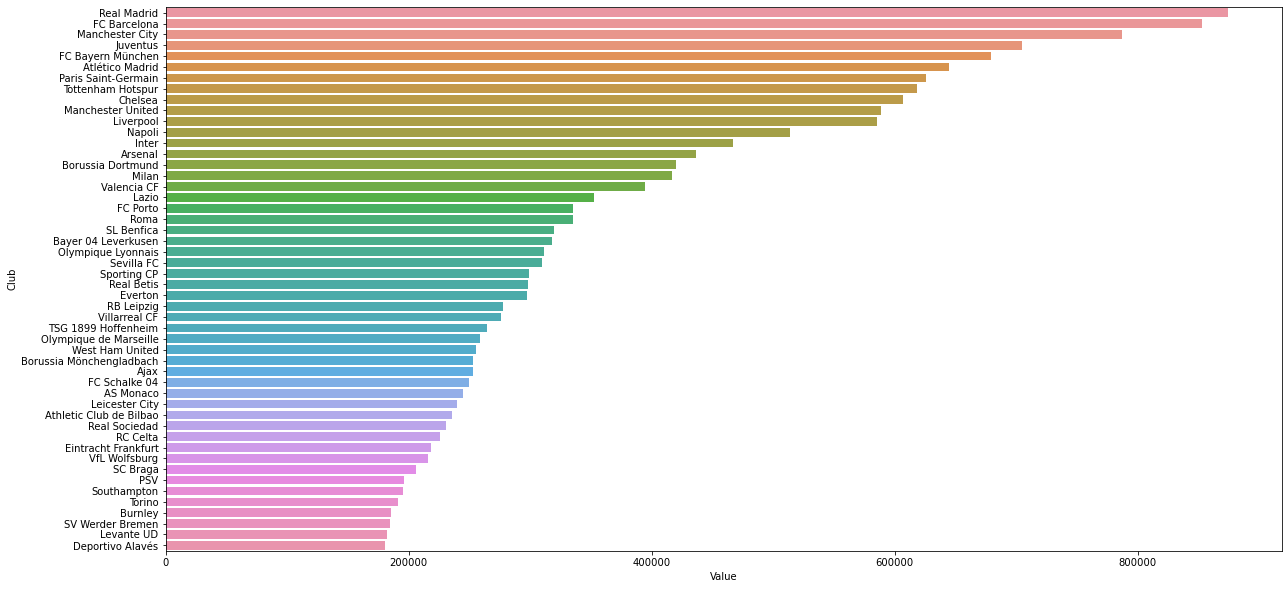

In [ ]:
import seaborn as sns
# 클럽 구단 가치 
group = df.groupby('Club')['Value'].sum().reset_index().sort_values('Value', ascending = False).head(50)
plt.figure(figsize = (20,10))
sns.barplot(x = 'Value', y = 'Club', data = group)

In [232]:
group.head(50)

NameError: name 'group' is not defined

In [ ]:
group = df.groupby(['Club'])[['Value']]
cmed= group.sum().sort_values(by=['Value'], ascending = False)

In [ ]:
cmed.describe()

,Value
count,651.000000
mean,67395.591398
std,109255.819191
min,1930.000000
25%,15277.500000
50%,30520.000000
75%,65742.500000
max,874425.000000


In [ ]:
club1=list(cmed.query('Value>=65745.2').index)
club1
club2=list(cmed.query('Value>=30520 & Value<65745.2').index)
club2
club3=list(cmed.query('Value>=15277.5 & Value <30520').index)
club4=list(cmed.query('Value<15277.5').index)
df.insert(7,'Club_4V',
            df.apply(lambda x: 
            3 if x['Club'] in club1
            else 2 if x['Club'] in club2
            else 1 if x['Club'] in  club3
            else 0, axis =1))

In [ ]:
# df.drop('Club_4V',axis=1, inplace=True)

In [ ]:
Club_overall

<AxesSubplot:xlabel='Overall', ylabel='Club'>

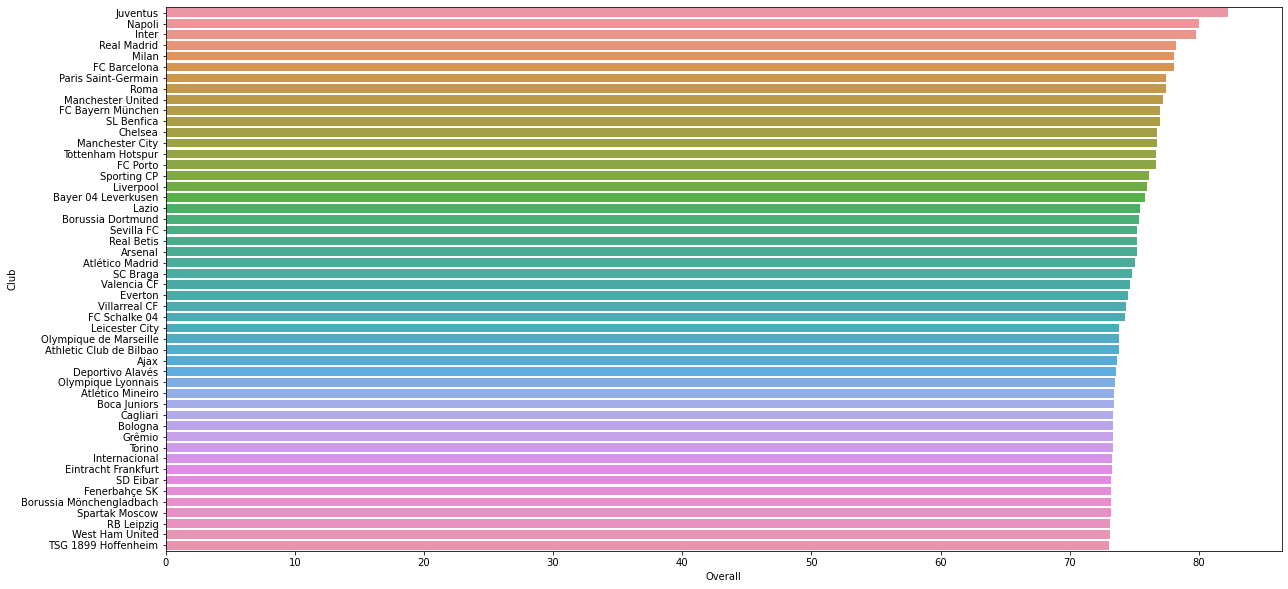

In [ ]:
# 우승하는 구단이 돈을 많이 벌 것이고, 우승확률은 전체 overall 로 해보면 어떨까
# -> 대신 선수 숫자가 다를 수 있으므로 mean으로 계산 해보자
# 클럽 오버롤 평균
group1 = df.groupby('Club')['Overall'].mean().reset_index().sort_values('Overall', ascending = False).head(50)
plt.figure(figsize = (20,10))
sns.barplot(x = 'Overall', y = 'Club', data = group1)

In [ ]:
group1.head(30)

,Club,Overall
326,Juventus,82.280000
398,Napoli,80.000000
315,Inter,79.750000
470,Real Madrid,78.242424
382,Milan,78.074074
212,FC Barcelona,78.030303
435,Paris Saint-Germain,77.433333
482,Roma,77.423077
375,Manchester United,77.242424
214,FC Bayern München,77.000000


In [ ]:
Club_Wage

<AxesSubplot:xlabel='Wage', ylabel='Club'>

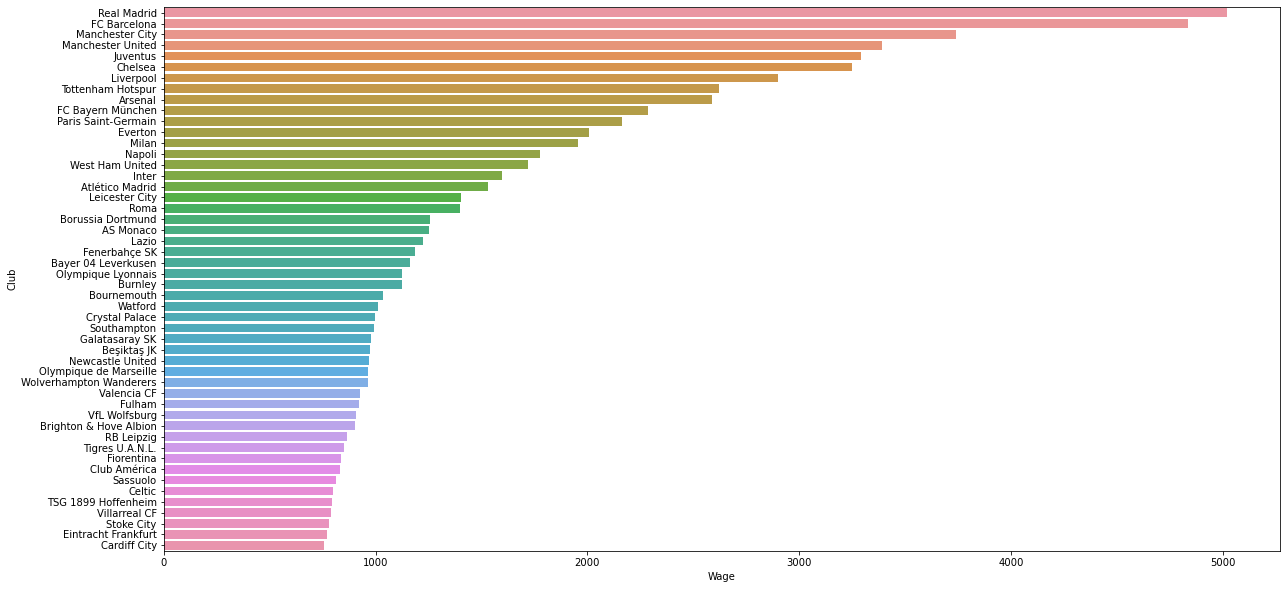

In [ ]:
group3 = df.groupby('Club')['Wage'].sum().reset_index().sort_values('Wage', ascending = False).head(50)
plt.figure(figsize = (20,10))
sns.barplot(x = 'Wage', y = 'Club', data = group3)

In [ ]:
group3.head(30)

,Club,Wage
470,Real Madrid,5017.0
212,FC Barcelona,4837.0
374,Manchester City,3741.0
375,Manchester United,3391.0
326,Juventus,3292.0
134,Chelsea,3249.0
363,Liverpool,2902.0
583,Tottenham Hotspur,2623.0
52,Arsenal,2588.0
214,FC Bayern München,2286.0


In [301]:
group3 = df.groupby(['Club'])[['Wage']]
cmed= group3.sum().sort_values(by=['Wage'], ascending = False)

In [302]:
cmed.describe()

,Wage
count,651.000000
mean,272.038402
std,499.444787
min,19.000000
25%,60.500000
50%,108.000000
75%,261.500000
max,5017.000000


In [ ]:
df['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [ ]:
df.drop('Club_4W',axis=1, inplace=True)

In [ ]:
club11=list(cmed.query('Wage>=261.5').index)
club11
club22=list(cmed.query('Wage>=108 & Wage<261.5').index)
club22
club33=list(cmed.query('Wage>=60.5 & Wage <108').index)
club44=list(cmed.query('Wage<60.5').index)
df.insert(7,'Club_4W',
            df.apply(lambda x: 
            3 if x['Club'] in club11
            else 2 if x['Club'] in club22
            else 1 if x['Club'] in  club33
            else 0, axis =1))

<AxesSubplot:xlabel='Club_4W', ylabel='Wage'>

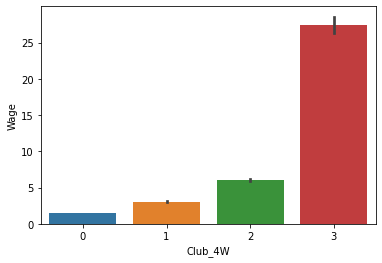

In [ ]:
sns.barplot(x=df.Club_4W, y = df.Wage)

In [ ]:
df['coe']=df.Potential-df.Overall 

In [ ]:
df['coe'].unique()

array([ 0,  1,  2,  3,  5,  7,  4,  6,  9,  8, 11, 10, 12, 15, 14, 13, 16,
       18, 17, 19, 20, 21, 22, 24, 23, 26, 25], dtype=int64)

In [ ]:
sort_coe=df.sort_values(by='coe', ascending=False)[['Age', 'coe']]
# sort_coe[sort_coe.coe==26].Age.unique()
# sort_coe[sort_coe.coe==25].Age.unique()
# sort_coe[sort_coe.coe==24].Age.unique()
# sort_coe[sort_coe.coe==23].Age.unique()
# sort_coe[sort_coe.coe==22].Age.unique()
# sort_coe[sort_coe.coe==21].Age.unique()
# sort_coe[sort_coe.coe==20].Age.unique()
# sort_coe[sort_coe.coe==19].Age.unique()
# sort_coe[sort_coe.coe==18].Age.unique()
# sort_coe[sort_coe.coe==17].Age.unique()
# sort_coe[sort_coe.coe==16].Age.unique()
sort_coe[sort_coe.coe==15].Age.unique()

array([19, 18, 17, 20, 21, 16], dtype=int64)

In [ ]:
sort_coe[sort_coe.coe==0].Age.unique()

array([33, 28, 30, 27, 32, 29, 31, 37, 35, 36, 26, 40, 34, 38, 39, 25, 44,
       41, 45, 42], dtype=int64)

In [ ]:
df.to_csv('dataset/fifa_0310.csv')

In [299]:
df=pd.read_csv('dataset/fifa_0310.csv',index_col=0)
df.head()

,Name,Age,Overall,Potential,Club,Value,Wage,Club_4W,Club_4V,Special,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Loaned,Age_C,Over_C
0,L. Messi,31,94,94,FC Barcelona,110500.0,565.0,3,3,2202,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,1,6,18
1,Cristiano Ronaldo,33,94,94,Juventus,77000.0,405.0,3,3,2228,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1,7,18
2,Neymar Jr,26,92,93,Paris Saint-Germain,118500.0,290.0,3,3,2143,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1,4,17
3,De Gea,27,91,93,Manchester United,72000.0,260.0,3,3,1471,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1,5,16
4,K. De Bruyne,27,91,92,Manchester City,102000.0,355.0,3,3,2281,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1,5,16


In [300]:
# 파생변수 1 Position_Class
df.insert(9,'Position_Class',
            df.apply(lambda x: 
            'Forward' if x['Position'] in ['LS','ST','RS','LW','LF','CF','RF','RW']
            else 'Midfielder' if x['Position'] in ['LAM','CAM','RAM','LM','LCM','CM',
                                                   'RCM','RM']
            else 'Defender' if x['Position'] in  ['LWB','LDM','CDM','RDM','RWB','LB',
                                                  'LCB','CB','RCB','RB']
            else 'GoalKeeper', axis =1))

In [134]:
def exchange1(value):
    out1 = value.split('+')[0]
    out2 = value.split('+')[1]
    return int(out1)+int(out2)  

포지션 데이터 내 + 계산하기

In [135]:
df1=df[df['Position']!='GK']
df1

,Name,Age,Overall,Potential,Club,Value,Wage,Club_4W,Club_4V,Position_Class,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Loaned,Age_C,Over_C
0,L. Messi,31,94,94,FC Barcelona,110500.0,565.0,3,3,Forward,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,1,6,18
1,Cristiano Ronaldo,33,94,94,Juventus,77000.0,405.0,3,3,Forward,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,1,7,18
2,Neymar Jr,26,92,93,Paris Saint-Germain,118500.0,290.0,3,3,Forward,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1,4,17
4,K. De Bruyne,27,91,92,Manchester City,102000.0,355.0,3,3,Midfielder,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1,5,16
5,E. Hazard,27,91,91,Chelsea,93000.0,340.0,3,3,Forward,...,27.0,22.0,11.0,12.0,6.0,8.0,8.0,1,5,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,47,65,Crewe Alexandra,60.0,1.0,1,0,Midfielder,...,48.0,47.0,10.0,13.0,7.0,8.0,9.0,1,1,1
18203,N. Christoffersson,19,47,63,Trelleborgs FF,60.0,1.0,0,0,Forward,...,15.0,19.0,10.0,9.0,9.0,5.0,12.0,1,1,1
18204,B. Worman,16,47,67,Cambridge United,60.0,1.0,0,0,Forward,...,13.0,11.0,6.0,5.0,10.0,6.0,13.0,1,1,1
18205,D. Walker-Rice,17,47,66,Tranmere Rovers,60.0,1.0,0,0,Forward,...,25.0,27.0,14.0,6.0,14.0,8.0,9.0,1,1,1


In [136]:
def exchange1(value):
    out1 = value.split('+')[0]
    out2 = value.split('+')[1]
    return int(out1)+int(out2)  

In [137]:
df1.LS = df1.LS.apply(lambda x: exchange1(x))
df1.ST = df1.ST.apply(lambda x: exchange1(x))
df1.RS = df1.RS.apply(lambda x: exchange1(x))
df1.LW = df1.LW.apply(lambda x: exchange1(x))
df1.LF = df1.LF.apply(lambda x: exchange1(x))
df1.CF = df1.CF.apply(lambda x: exchange1(x))
df1.RF = df1.RF.apply(lambda x: exchange1(x))
df1.RW = df1.RW.apply(lambda x: exchange1(x))
df1.LAM = df1.LAM.apply(lambda x: exchange1(x))
df1.CAM = df1.CAM.apply(lambda x: exchange1(x))
df1.RAM = df1.RAM.apply(lambda x: exchange1(x))
df1.LM = df1.LM.apply(lambda x: exchange1(x))
df1.LCM = df1.LCM.apply(lambda x: exchange1(x))
df1.CM = df1.CM.apply(lambda x: exchange1(x))
df1.RCM = df1.RCM.apply(lambda x: exchange1(x))
df1.RM = df1.RM.apply(lambda x: exchange1(x))
df1.LWB = df1.LWB.apply(lambda x: exchange1(x))
df1.LDM = df1.LDM.apply(lambda x: exchange1(x))
df1.CDM = df1.CDM.apply(lambda x: exchange1(x))
df1.RDM = df1.RDM.apply(lambda x: exchange1(x))
df1.RWB = df1.RWB.apply(lambda x: exchange1(x))
df1.LB = df1.LB.apply(lambda x: exchange1(x))
df1.LCB = df1.LCB.apply(lambda x: exchange1(x))
df1.CB = df1.CB.apply(lambda x: exchange1(x))
df1.RCB = df1.RCB.apply(lambda x: exchange1(x))
df1.RB = df1.RB.apply(lambda x: exchange1(x))

In [ ]:
#스킬류 모두 합산하는 코드
# dd=df1[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
#        'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
#        'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']]
# df1['Position_Score']=dd.apply(lambda x: x.sum(),axis=1)

In [138]:
forw=['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
mid=['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM']
defen=['LWB', 'LDM','CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

In [139]:
df1['forward']=df1[forw].mean(axis=1).round(0)
df1['midfielder']=df1[mid].mean(axis=1).round(0)
df1['defender']=df1[defen].mean(axis=1).round(0)

In [140]:
df1['Position_Score']=np.nan

In [141]:
# 으아 됐다아아아아아 ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ
for i in range(len(df1)):
    if df1.iloc[i, 9] == 'Forward':
        df1.iloc[i, 86] = df1.iloc[i,83]
    elif df1.iloc[i, 9] == 'Midfielder':
        df1.iloc[i, 86] = df1.iloc[i,84]
    elif df1.iloc[i, 9] == 'Defender':
        df1.iloc[i, 86] = df1.iloc[i,85]
#     elif df1.iloc[i, 9] == 'GoalKeeper':
#         df1.iloc[i, 86] = df1.iloc[i,2]

In [142]:
df1.drop(['forward','midfielder','defender'], axis=1, inplace=True)

In [143]:
df_GK=df[df['Position']=='GK']
df_GK

,Name,Age,Overall,Potential,Club,Value,Wage,Club_4W,Club_4V,Position_Class,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Loaned,Age_C,Over_C
3,De Gea,27,91,93,Manchester United,72000.0,260.0,3,3,GoalKeeper,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1,5,16
9,J. Oblak,25,90,93,Atlético Madrid,68000.0,94.0,3,3,GoalKeeper,...,12.0,18.0,86.0,92.0,78.0,88.0,89.0,1,4,15
18,M. ter Stegen,26,89,92,FC Barcelona,58000.0,240.0,3,3,GoalKeeper,...,13.0,10.0,87.0,85.0,88.0,85.0,90.0,1,4,14
19,T. Courtois,26,89,90,Real Madrid,53500.0,240.0,3,3,GoalKeeper,...,18.0,16.0,85.0,91.0,72.0,86.0,88.0,1,4,14
22,M. Neuer,32,89,89,FC Bayern München,38000.0,130.0,3,3,GoalKeeper,...,10.0,11.0,90.0,86.0,91.0,87.0,87.0,1,7,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18178,L. Wahlstedt,18,48,65,Dalkurd FF,50.0,1.0,0,0,GoalKeeper,...,11.0,10.0,47.0,46.0,50.0,45.0,51.0,1,1,1
18180,M. Hurst,22,48,58,St. Johnstone FC,40.0,1.0,0,0,GoalKeeper,...,15.0,16.0,45.0,49.0,50.0,50.0,45.0,1,2,1
18183,K. Pilkington,44,48,48,Cambridge United,0.0,1.0,0,0,GoalKeeper,...,15.0,13.0,45.0,48.0,44.0,49.0,46.0,1,11,1
18194,J. Milli,18,47,65,Lecce,50.0,1.0,1,1,GoalKeeper,...,10.0,11.0,52.0,52.0,52.0,40.0,44.0,1,1,1


In [144]:
df_GK['Position_Score']=np.nan

In [145]:
for i in range(len(df_GK)):
    if df_GK.iloc[i, 9] == 'GoalKeeper':
        df_GK.iloc[i, 83] = df_GK.iloc[i,2]

In [146]:
df_GK.iloc[:,83]

3        91.0
9        90.0
18       89.0
19       89.0
22       89.0
         ... 
18178    48.0
18180    48.0
18183    48.0
18194    47.0
18198    47.0
Name: Position_Score, Length: 1992, dtype: float64

In [147]:
# df1(GK 아닌 선수들) + df_GK 합치기
df_all = pd.concat([df1,df_GK]) 

In [34]:
df_all.head()

,Name,Age,Overall,Potential,Club,Value,Wage,Club_4W,Club_4V,Position_Class,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Loaned,Age_C,Over_C,Position_Score
0,L. Messi,31,94,94,FC Barcelona,110500.0,565.0,3,3,Forward,...,26.0,6.0,11.0,15.0,14.0,8.0,1,6,18,93.0
1,Cristiano Ronaldo,33,94,94,Juventus,77000.0,405.0,3,3,Forward,...,23.0,7.0,11.0,15.0,14.0,11.0,1,7,18,93.0
2,Neymar Jr,26,92,93,Paris Saint-Germain,118500.0,290.0,3,3,Forward,...,33.0,9.0,9.0,15.0,15.0,11.0,1,4,17,90.0
4,K. De Bruyne,27,91,92,Manchester City,102000.0,355.0,3,3,Midfielder,...,51.0,15.0,13.0,5.0,10.0,13.0,1,5,16,91.0
5,E. Hazard,27,91,91,Chelsea,93000.0,340.0,3,3,Forward,...,22.0,11.0,12.0,6.0,8.0,8.0,1,5,16,89.0


OLS 회귀 분석으로 어떤 Special이 더 좋을지 파악해봄(Ordinary Least Square)

In [148]:
lm_fifa=smf.ols('Wage~ Value + Overall + Position_Score', data=df_all).fit()
lm_fifa.params

Intercept        -10.150418
Value              0.003232
Overall            0.130594
Position_Score     0.053379
dtype: float64

In [149]:
sm.stats.anova_lm(lm_fifa).round(1)

,df,sum_sq,mean_sq,F,PR(>F)
Value,1.0,6467469.2,6467469.2,50372.7,0.0
Overall,1.0,17071.0,17071.0,133.0,0.0
Position_Score,1.0,182.9,182.9,1.4,0.2
Residual,17914.0,2300021.8,128.4,NaN,NaN


In [150]:
df_all['Special_Score1']=df_all.Special+df_all.Composure

In [151]:
df_all['Special_Score2']=df_all.Special
df_all['Special_Score3']=df_all.Special+df_all.Composure
df_all['Special_Score4']=df_all.Potential+df_all.Special
df_all['Special_Score5']=df_all.Potential+df_all.Special+df_all.Composure

In [174]:
df_all['Special_Score6']=df_all.Overall+df_all.Potential+df_all.Special+df_all.Composure

In [166]:
df_all.columns

Index(['Name', 'Age', 'Overall', 'Potential', 'Club', 'Value', 'Wage',
       'Club_4W', 'Club_4V', 'Position_Class', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Real Face',
       'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Loaned', '

In [167]:
lm_fifa2=smf.ols('Wage~ Over_C+Wage', data=df_all).fit()
lm_fifa2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.233e+32
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:27:33   Log-Likelihood:             5.0487e+05
No. Observations:               17918   AIC:                        -1.010e+06
Df Residuals:                   17915   BIC:                        -1.010e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.526e-13   2.32e-15   -109.089      0.000   -2.57e-13   -2.48e-13
Over_C      1.183e-13   1.06e-15    111.747      0.000    1.16e-13     1.2e-13
Wage           1.0000   7.56e-17   1.32e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     5462.877   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19681.771
Skew:                          -1.511   Prob(JB):                         0.00
Kurtosis:                       7.150   Cond. No.                         58.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
club1=['Real Madrid',
 'FC Barcelona',
 'Manchester City',
 'Manchester United',
 'Juventus',
 'Chelsea',
 'Liverpool',
 'Tottenham Hotspur',
 'Arsenal',
 'FC Bayern München',
 'Paris Saint-Germain',
 'Everton',
 'Milan',
 'Napoli',
 'West Ham United',
 'Inter',
 'Atlético Madrid',
 'Leicester City',
 'Roma',
 'Borussia Dortmund',
 'AS Monaco',
 'Lazio',
 'Fenerbahçe SK',
 'Bayer 04 Leverkusen',
 'Olympique Lyonnais',
 'Burnley',
 'Bournemouth',
 'Watford',
 'Crystal Palace',
 'Southampton']

In [237]:
club2=['Galatasaray SK',
 'Beşiktaş JK',
 'Newcastle United',
 'Olympique de Marseille',
 'Wolverhampton Wanderers',
 'Valencia CF',
 'Fulham',
 'VfL Wolfsburg',
 'Brighton & Hove Albion',
 'RB Leipzig',
 'Tigres U.A.N.L.',
 'Fiorentina',
 'Club América',
 'Sassuolo',
 'Celtic',
 'TSG 1899 Hoffenheim',
 'Villarreal CF',
 'Stoke City',
 'Eintracht Frankfurt',
 'Cardiff City',
 'Nottingham Forest',
 'Torino',
 'Middlesbrough',
 'Huddersfield Town',
 'FC Schalke 04',
 'FC Girondins de Bordeaux',
 'Sampdoria',
 'Parma',
 'Rangers FC',
 'Real Sociedad',
 'Girona FC',
 'Derby County',
 'Borussia Mönchengladbach',
 'Bologna',
 'Real Betis',
 'CD Leganés',
 'Monterrey',
 'Leeds United',
 'SV Werder Bremen',
 'Cagliari',
 'VfB Stuttgart',
 'SD Eibar',
 'Hannover 96',
 'Sevilla FC',
 'Levante UD',
 'Medipol Başakşehir FK',
 'Al Hilal',
 'Athletic Club de Bilbao',
 'Hertha BSC',
 'West Bromwich Albion',
 'OGC Nice',
 'Wigan Athletic',
 'Stade Rennais FC',
 'Atlético Mineiro',
 'RC Celta',
 'FC Nantes',
 'Atalanta',
 'Rayo Vallecano',
 '1. FSV Mainz 05',
 'Boca Juniors',
 'Toulouse Football Club',
 'Getafe CF',
 'Bristol City',
 'AS Saint-Étienne',
 'Deportivo Alavés',
 'RCD Espanyol',
 'Udinese',
 'Aston Villa',
 'Fortuna Düsseldorf',
 'Al Ahli',
 'Sporting CP',
 'Grêmio',
 'Guangzhou Evergrande Taobao FC',
 'Trabzonspor',
 'FC Red Bull Salzburg',
 'Guadalajara',
 'FC Augsburg',
 'SC Freiburg',
 'Al Nassr',
 'Norwich City',
 'Brentford',
 'Swansea City',
 'FC Porto',
 'Sheffield Wednesday',
 'Internacional',
 'Independiente',
 'Cruzeiro',
 '1. FC Union Berlin',
 'Montpellier HSC',
 'Fluminense',
 'Angers SCO',
 'Club Brugge KV',
 '1. FC Köln',
 'SD Huesca',
 'Al Ittihad',
 'FC Basel 1893',
 'Stade Malherbe Caen',
 'Blackburn Rovers',
 'Reading',
 'LOSC Lille',
 'Ajax',
 'Real Valladolid CF',
 'Racing Club',
 'SC Braga',
 'Frosinone',
 'Göztepe SK',
 'Club León',
 'Pachuca',
 'En Avant de Guingamp',
 'River Plate',
 'SL Benfica',
 'Genoa',
 'Deportivo Toluca',
 'Cruz Azul',
 'MKE Ankaragücü',
 'Vitesse',
 'KAA Gent',
 'RSC Anderlecht',
 '1. FC Nürnberg',
 'Birmingham City',
 'Chievo Verona',
 'FC Ingolstadt 04',
 'Hull City',
 'PSV',
 'Bursaspor',
 'Empoli',
 'Santos Laguna',
 'Standard de Liège',
 'Botafogo',
 'Amiens SC',
 'SPAL',
 'RC Strasbourg Alsace',
 'Al Wehda']

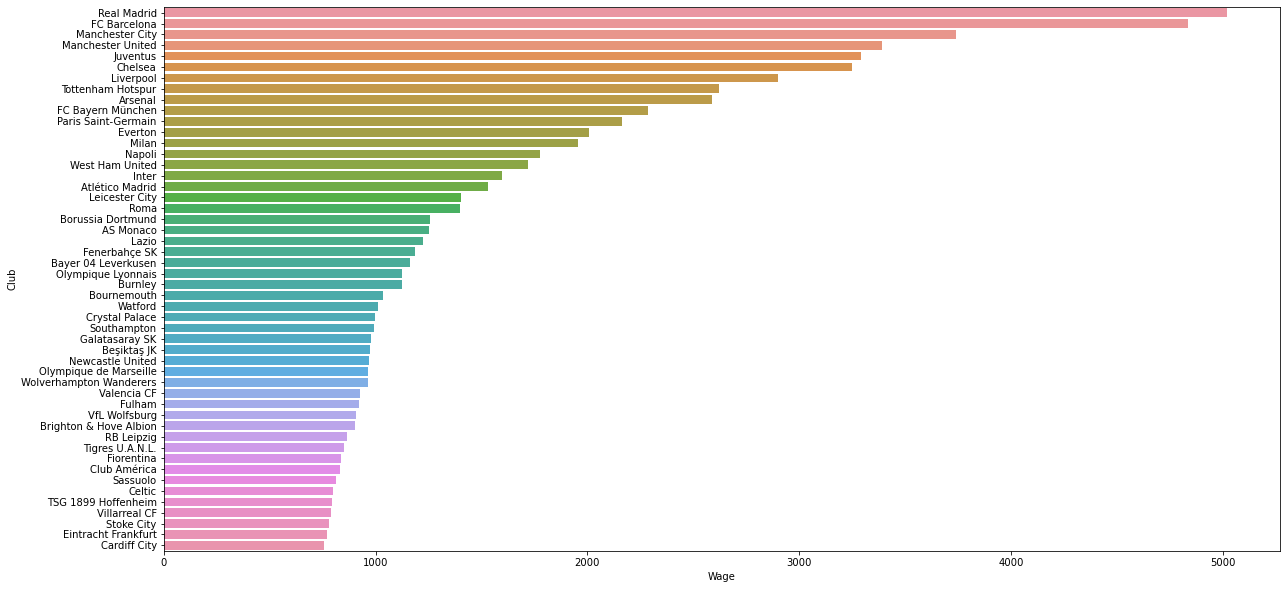

In [238]:
group3 = df.groupby('Club')['Wage'].sum().reset_index().sort_values('Wage', ascending = False).head(50)
plt.figure(figsize = (20,10))
sns.barplot(x = 'Wage', y = 'Club', data = group3)

In [239]:
group3 = df.groupby(['Club'])[['Wage']]
cmed= group3.sum().sort_values(by=['Wage'], ascending = False)

In [240]:
cmed.describe()

,Wage
count,651.000000
mean,272.038402
std,499.444787
min,19.000000
25%,60.500000
50%,108.000000
75%,261.500000
max,5017.000000


In [241]:
club3=list(cmed.query('Wage>=108 & Wage<261.5').index)
club3
club4=list(cmed.query('Wage>=60.5 & Wage <108').index)
club5=list(cmed.query('Wage<60.5').index)

In [245]:
df_all.insert(7,'Club_5',
            df_all.apply(lambda x: 
            4 if x['Club'] in club1
            else 3 if x['Club'] in club2
            else 2 if x['Club'] in club3
            else 1 if x['Club'] in club4
            else 0, axis =1))

In [256]:
df_all.columns

Index(['Name', 'Age', 'Overall', 'Potential', 'Club', 'Value', 'Wage',
       'Club_5', 'Club_4W', 'Club_4V', 'Position_Class', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Composure', 'Loaned', 'Age_C', 'Over_C', 'Position_Score',
       'Special_Score1', 'Special_Score2', 'Special_Score3', 'Special_Score4',
       'Special_Score5', 'Special_Score6', 'Real_Face', 'Club_Overall',
       'Overall_div'],
      dtype='object')

In [263]:
df_all.iloc[:,7].unique()

array([4, 1, 3, 2, 0], dtype=int64)

In [282]:
df_all['Club_Overall']=np.nan

In [255]:
bins = [0,73, 80, 85, 99]
group_names=[0,1,2,3]
df_all['Overall_div']=pd.cut(df_all['Overall'], bins, labels=group_names, include_lowest=True)

In [283]:
# 으아 됐다아아아아아 ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ
for i in range(len(df_all)):
    if df_all.iloc[i, 7] == 4: # club 30위 순
        if df_all.iloc[i,33] ==3: # overall 85 이상
            df_all.iloc[i, 32] = 3
        elif df_all.iloc[i,33] ==2: # overall 80이상, 85 미만
            df_all.iloc[i, 32] = 2
        elif df_all.iloc[i,33] ==1: # overall 73이상, 80 미만
            df_all.iloc[i, 32] = 1
        else:
            df_all.iloc[i, 32] = 0    
            
    elif df_all.iloc[i, 7] == 3: # club2 그룹 이내
        if df_all.iloc[i,33] ==3: # overall 85 이상 (거의 없음)
            df_all.iloc[i, 32] = 2 
        elif df_all.iloc[i,33] ==2: # overall 80 이상, 85 미만
            df_all.iloc[i,32] = 1
        else:
            df_all.iloc[i,32] =0
            
    elif df_all.iloc[i, 7] == 2: # club3 그룹 이내
        if df_all.iloc[i,33] >= 2: # overall 80이상
            df_all.iloc[i,32] =1
        else:
            df_all.iloc[i,32] =0
    else: # 클럽 4분위수는 거의 연봉이 1000임
        df_all.iloc[i,32]=0

In [279]:
df_all.columns

Index(['Name', 'Age', 'Overall', 'Potential', 'Club', 'Value', 'Wage',
       'Club_5', 'Club_4W', 'Club_4V', 'Position_Class', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Composure', 'Loaned', 'Age_C', 'Over_C', 'Position_Score',
       'Special_Score1', 'Special_Score2', 'Special_Score3', 'Special_Score4',
       'Special_Score5', 'Special_Score6', 'Real_Face', 'Club_Overall',
       'Overall_div'],
      dtype='object')

In [298]:
heat=df_all[['Wage', 'International Reputation', 'Value','Special_Score5','Overall','Club_Overall','Club_W']]

KeyError: "['Club_W'] not in index"

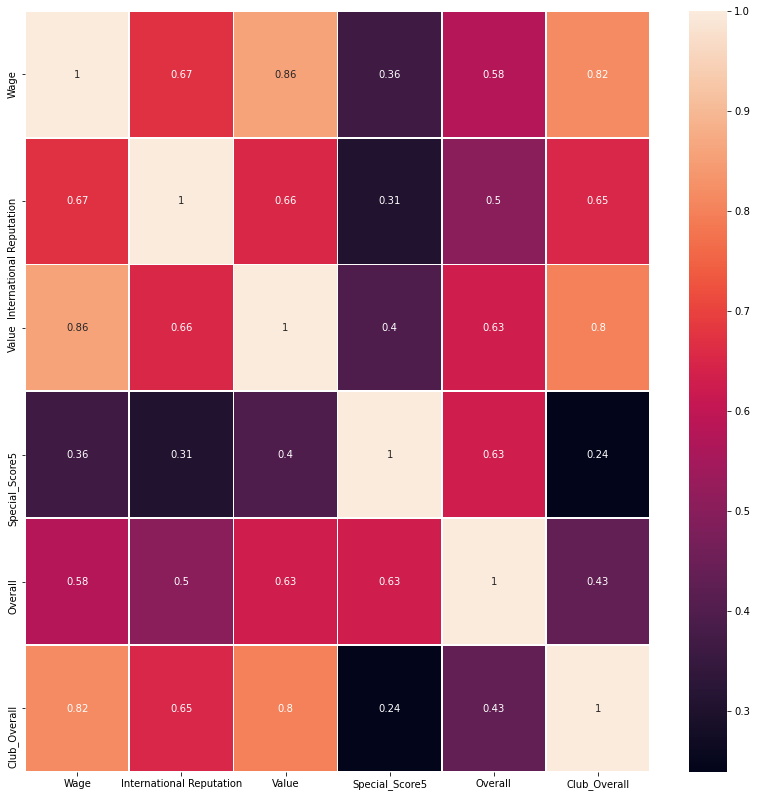

In [295]:
plt.figure(figsize=(14,14))
sns.heatmap(heat.corr(),linewidths=.8, annot=True) 

In [297]:
heat.to_csv('dataset/final.csv')

In [168]:
lm_fifa2=smf.ols('Wage~ Overall+Wage', data=df_all).fit()
lm_fifa2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.254e+32
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:27:50   Log-Likelihood:             5.0495e+05
No. Observations:               17918   AIC:                        -1.010e+06
Df Residuals:                   17915   BIC:                        -1.010e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.581e-12   1.19e-14   -132.590      0.000    -1.6e-12   -1.56e-12
Overall      2.44e-14   1.84e-16    132.567      0.000     2.4e-14    2.48e-14
Wage           1.0000   5.76e-17   1.74e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     5556.115   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50099.782
Skew:                           1.231   Prob(JB):                         0.00
Kurtosis:                      10.813   Cond. No.                         773.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
lm_fifa1=smf.ols('Wage~ Special_Score5', data=df_all).fit()
lm_fifa1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     2883.
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:18:13   Log-Likelihood:                -79589.
No. Observations:               17918   AIC:                         1.592e+05
Df Residuals:                   17916   BIC:                         1.592e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -41.3771      0.967    -42.788      0.000     -43.273     -39.482
Special_Score5     0.0286      0.001     53.689      0.000       0.028       0.030
==============================================================================
Omnibus:                    24690.710   Durbin-Watson:                   0.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8705536.976
Skew:                           7.940   Prob(JB):                         0.00
Kurtosis:                     109.810   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [156]:
im_model = smf.ols(formula = 'Wage~Special',data = df_all).fit()
im_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     2504.
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:25:16   Log-Likelihood:                -79753.
No. Observations:               17918   AIC:                         1.595e+05
Df Residuals:                   17916   BIC:                         1.595e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.5096      0.920    -38.586      0.000     -37.313     -33.706
Special        0.0284      0.001     50.040      0.000       0.027       0.030
==============================================================================
Omnibus:                    24662.391   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8551372.279
Skew:                           7.930   Prob(JB):                         0.00
Kurtosis:                     108.842   Cond. No.                     9.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [157]:
im_model1 = smf.ols(formula = 'Wage~Special_Score1',data = df_all).fit()
im_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     2609.
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:25:27   Log-Likelihood:                -79707.
No. Observations:               17918   AIC:                         1.594e+05
Df Residuals:                   17916   BIC:                         1.594e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -36.5472      0.922    -39.635      0.000     -38.355     -34.740
Special_Score1     0.0280      0.001     51.076      0.000       0.027       0.029
==============================================================================
Omnibus:                    24672.096   Durbin-Watson:                   0.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8596847.734
Skew:                           7.934   Prob(JB):                         0.00
Kurtosis:                     109.128   Cond. No.                     1.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
im_model2 = smf.ols(formula = 'Wage~Special_Score2',data = df_all).fit()
im_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     2504.
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:25:33   Log-Likelihood:                -79753.
No. Observations:               17918   AIC:                         1.595e+05
Df Residuals:                   17916   BIC:                         1.595e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -35.5096      0.920    -38.586      0.000     -37.313     -33.706
Special_Score2     0.0284      0.001     50.040      0.000       0.027       0.030
==============================================================================
Omnibus:                    24662.391   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8551372.279
Skew:                           7.930   Prob(JB):                         0.00
Kurtosis:                     108.842   Cond. No.                     9.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
im_model3 = smf.ols(formula = 'Wage~Special_Score3',data = df_all).fit()
im_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     2609.
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:25:36   Log-Likelihood:                -79707.
No. Observations:               17918   AIC:                         1.594e+05
Df Residuals:                   17916   BIC:                         1.594e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -36.5472      0.922    -39.635      0.000     -38.355     -34.740
Special_Score3     0.0280      0.001     51.076      0.000       0.027       0.029
==============================================================================
Omnibus:                    24672.096   Durbin-Watson:                   0.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8596847.734
Skew:                           7.934   Prob(JB):                         0.00
Kurtosis:                     109.128   Cond. No.                     1.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
im_model4 = smf.ols(formula = 'Wage~Special_Score4',data = df_all).fit()
im_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     2634.
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:25:38   Log-Likelihood:                -79696.
No. Observations:               17918   AIC:                         1.594e+05
Df Residuals:                   17916   BIC:                         1.594e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -38.1695      0.949    -40.222      0.000     -40.030     -36.309
Special_Score4     0.0288      0.001     51.321      0.000       0.028       0.030
==============================================================================
Omnibus:                    24668.557   Durbin-Watson:                   0.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8597885.444
Skew:                           7.931   Prob(JB):                         0.00
Kurtosis:                     109.135   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
im_model5 = smf.ols(formula = 'Wage~Special_Score5',data = df_all).fit()
im_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     2737.
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:25:43   Log-Likelihood:                -79652.
No. Observations:               17918   AIC:                         1.593e+05
Df Residuals:                   17916   BIC:                         1.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -39.1363      0.950    -41.211      0.000     -40.998     -37.275
Special_Score5     0.0284      0.001     52.312      0.000       0.027       0.029
==============================================================================
Omnibus:                    24678.400   Durbin-Watson:                   0.577
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8643037.397
Skew:                           7.936   Prob(JB):                         0.00
Kurtosis:                     109.418   Cond. No.                     1.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [186]:
df_all.drop([ 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'], axis=1, inplace=True)

In [187]:
df_all.columns

Index(['Name', 'Age', 'Overall', 'Potential', 'Club', 'Value', 'Wage',
       'Club_4W', 'Club_4V', 'Position_Class', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Real Face',
       'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Composure', 'Loaned', 'Age_C', 'Over_C',
       'Position_Score', 'Special_Score1', 'Special_Score2', 'Special_Score3',
       'Special_Score4', 'Special_Score5', 'Special_Score6'],
      dtype='object')

In [189]:
df_all['Real Face'].unique()

array(['Yes', 'No'], dtype=object)

In [199]:
df_all['Real_Face']=df_all['Real Face']
df_all.drop('Real Face', axis=1, inplace=True)

In [200]:
df_all['Real_Face'].replace({'Yes':1, 'No':0},inplace= True)

In [231]:
df_all.to_csv('dataset/fifa_0315.csv')

In [202]:
im_model6 = smf.ols(formula = 'Wage~Real_Face',data = df_all).fit()
im_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     5832.
Date:                Mon, 15 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:17:48   Log-Likelihood:                -78401.
No. Observations:               17918   AIC:                         1.568e+05
Df Residuals:                   17916   BIC:                         1.568e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3845      0.151     42.334      0.000       6.089       6.680
Real_Face     37.9075      0.496     76.368      0.000      36.935      38.880
==============================================================================
Omnibus:                    24148.219   Durbin-Watson:                   0.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9516248.892
Skew:                           7.538   Prob(JB):                         0.00
Kurtosis:                     114.889   Cond. No.                         3.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
is_face=df_all[df_all['Real Face']=='Yes']
is_face.Wage.describe()

count    1654.000000
mean       44.292019
std        55.096901
min         1.000000
25%        10.000000
50%        28.000000
75%        53.000000
max       565.000000
Name: Wage, dtype: float64

In [225]:
test=df_all[['Name', 'Club','Wage','Club_4V', 'Position_Class', 'International Reputation', 'Weak Foot','Jersey Number',
            'Skill Moves','Loaned','Special_Score5']].sort_values(by='Wage',ascending=False).head(3000)

In [218]:
test.isnull().sum()

Name                        0
Club                        0
Wage                        0
Club_4V                     0
Position_Class              0
International Reputation    0
Weak Foot                   0
Jersey Number               0
Skill Moves                 0
Loaned                      0
Special_Score5              0
dtype: int64

In [226]:
test['Jersey Number'].value_counts()

10.0    155
9.0     143
8.0     139
7.0     136
11.0    129
       ... 
58.0      1
72.0      1
46.0      1
80.0      1
95.0      1
Name: Jersey Number, Length: 79, dtype: int64

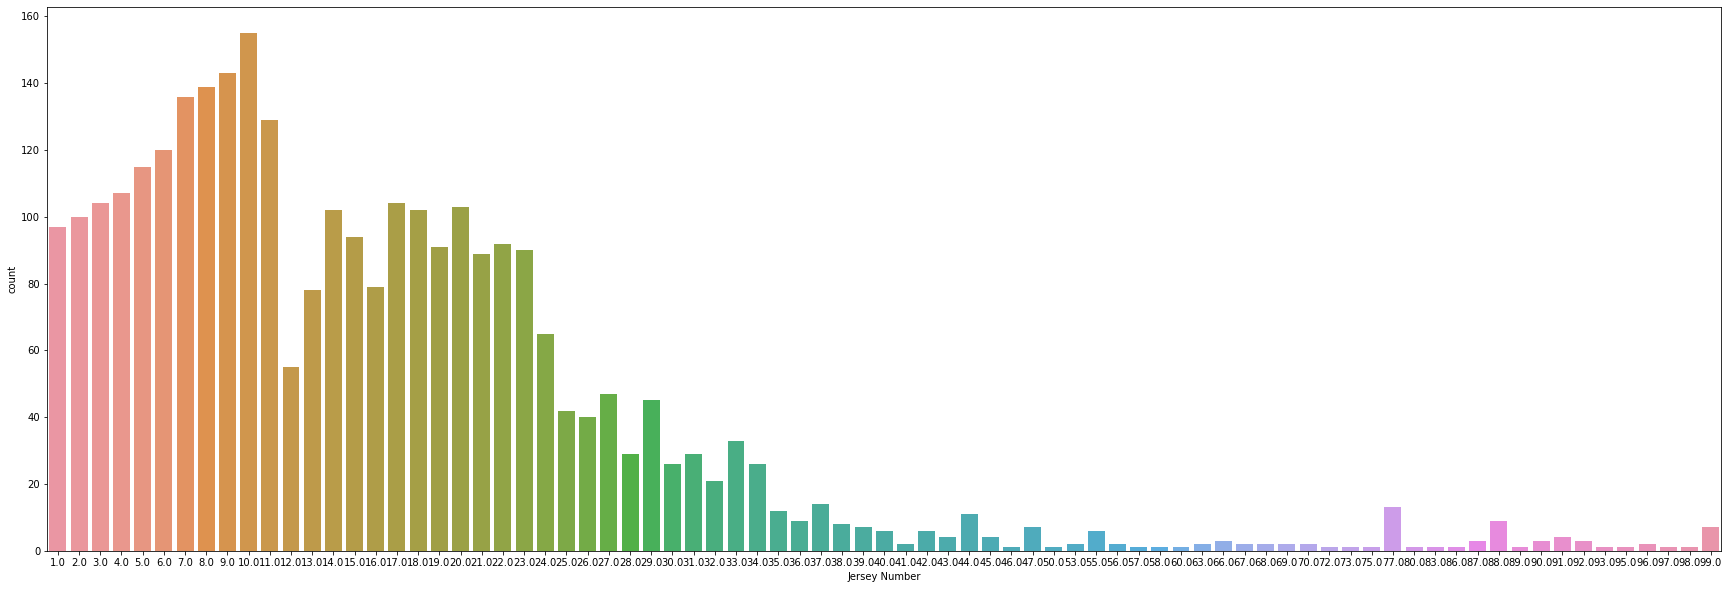

In [227]:
plt.figure(figsize=(30,10))
sns.countplot(test['Jersey Number']) # 3000

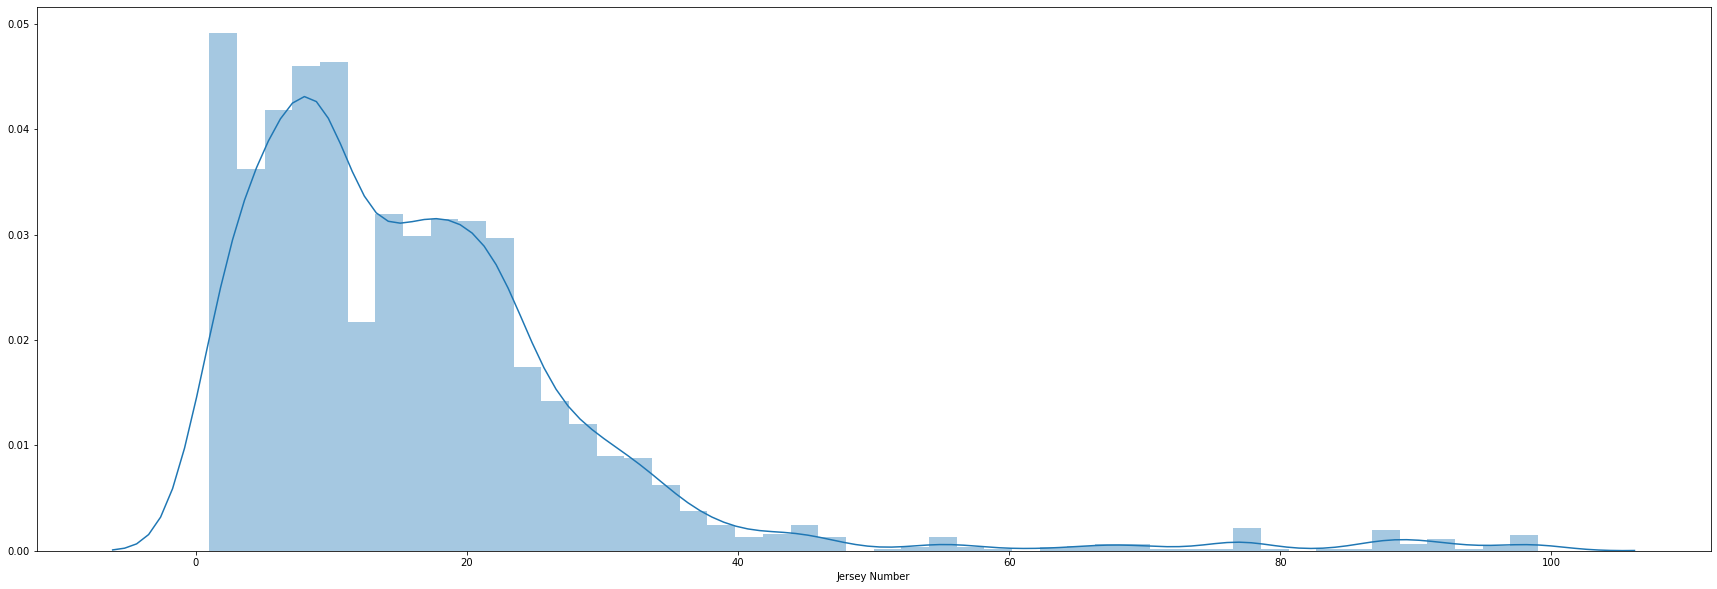

In [228]:
plt.figure(figsize=(30,10))
sns.distplot(test['Jersey Number']) # 3000

In [229]:
pdf2= pd.pivot_table(test,
                     index = 'Jersey Number',
                     values ='Wage',
                     aggfunc ='mean')
pdf2.sort_values(by='Wage', ascending=False).head(10)

,Wage
Jersey Number,
89.0,65.000000
92.0,63.333333
50.0,62.000000
10.0,55.683871
83.0,51.000000
9.0,49.251748
7.0,47.522059
12.0,47.345455
31.0,46.862069


In [230]:
pdf1= pd.pivot_table(test,
                     index = 'Jersey Number',
                     values ='Wage',
                     aggfunc = ['mean','count'])
pdf1

,mean,count
,Wage,Wage
Jersey Number,,
1.0,44.164948,97
2.0,39.880000,100
3.0,38.461538,104
4.0,40.327103,107
5.0,38.756522,115
...,...,...
95.0,19.000000,1
96.0,28.500000,2
